In [233]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [234]:
# import praw
# client_id = 'fcKozhcDPCzhzSKlbJYVTw'
# client_secret = 'lQKO0wL5lU9YM33jpnHSuWj1HNXoYg'
# user_name = 'Phong'
# reddit = praw.Reddit(client_id=client_id,
#                      client_secret=client_secret,
#                      user_agent=user_name)

In [235]:
headlines = pd.read_excel("data/data_scrape.xlsx")[["Titles"]]

In [236]:
# for submission in reddit.subreddit('politics').new(limit=None):
#     headlines.add(submission.title)
#     display.clear_output()
#     print(len(headlines))

In [237]:
headlines

,Titles
0,Benzinga's Top #PreMarket Gainers Benzinga's T...
1,A Glum View On A High-Flying Sector A Glum Vie...
2,Facebook's WhatsApp To Take On FaceTime And Sk...
3,"Earnings Scheduled For January 7, 2016 Earning..."
4,Should Investors Be Worried About Apple? Shoul...
...,...
1965,Cash-Rich Apple Still Needs Billions To Catch ...
1966,Steve Jobs' Biographer Says Apple Would Be 'Mo...
1967,Honeywell Likely To Report Higher Q3 Revenue; ...
1968,Investor Fear Grows Further Following Earnings...


In [238]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\84866\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [239]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines.values:
    pol_score = sia.polarity_scores(line[0])
    pol_score['headline'] = line[0]
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.981,
  'headline': "Benzinga's Top #PreMarket Gainers Benzinga's Top #PreMarket Gainers Benzinga's Top "
              '#PreMarket Gainers Head To The Polls With This ETF In 2016 Head To The Polls With '
              'This ETF In 2016 Head To The Polls With This ETF In 2016 Head To The Polls With '
              'This ETF In 2016 Head To The Polls With This ETF In 2016 Head To The Polls With '
              'This ETF In 2016 Download Microsoft With This ETF Download Microsoft With This ETF '
              'Download Microsoft With This ETF Download Microsoft With This ETF Download '
              'Microsoft With This ETF Download Microsoft With This ETF This Dividend ETF Looks '
              'Primed For A Solid 2016 This Dividend ETF Looks Primed For A Solid 2016 This '
              'Dividend ETF Looks Primed For A Solid 2016 This Dividend ETF Looks Primed For A '
              'Solid 2016 This Dividend ETF Looks Primed For A Solid 2016 This Dividend ETF Looks '
     

In [240]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.014,0.894,0.093,0.9810,Benzinga's Top #PreMarket Gainers Benzinga's T...
1,0.134,0.781,0.086,-0.9802,A Glum View On A High-Flying Sector A Glum Vie...
2,0.133,0.806,0.060,-0.9907,Facebook's WhatsApp To Take On FaceTime And Sk...
3,0.165,0.779,0.056,-0.9945,"Earnings Scheduled For January 7, 2016 Earning..."
4,0.090,0.846,0.064,-0.9300,Should Investors Be Worried About Apple? Shoul...


In [241]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.014,0.894,0.093,0.9810,Benzinga's Top #PreMarket Gainers Benzinga's T...,1
1,0.134,0.781,0.086,-0.9802,A Glum View On A High-Flying Sector A Glum Vie...,-1
2,0.133,0.806,0.060,-0.9907,Facebook's WhatsApp To Take On FaceTime And Sk...,-1
3,0.165,0.779,0.056,-0.9945,"Earnings Scheduled For January 7, 2016 Earning...",-1
4,0.090,0.846,0.064,-0.9300,Should Investors Be Worried About Apple? Shoul...,-1


In [242]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [243]:
df2.head()

,headline,label
0,Benzinga's Top #PreMarket Gainers Benzinga's T...,1
1,A Glum View On A High-Flying Sector A Glum Vie...,-1
2,Facebook's WhatsApp To Take On FaceTime And Sk...,-1
3,"Earnings Scheduled For January 7, 2016 Earning...",-1
4,Should Investors Be Worried About Apple? Shoul...,-1


In [244]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

["Benzinga's Top #PreMarket Gainers Benzinga's Top #PreMarket Gainers Benzinga's Top #PreMarket Gainers Head To The Polls With This ETF In 2016 Head To The Polls With This ETF In 2016 Head To The "
 'Polls With This ETF In 2016 Head To The Polls With This ETF In 2016 Head To The Polls With This ETF In 2016 Head To The Polls With This ETF In 2016 Download Microsoft With This ETF Download '
 'Microsoft With This ETF Download Microsoft With This ETF Download Microsoft With This ETF Download Microsoft With This ETF Download Microsoft With This ETF This Dividend ETF Looks Primed For A '
 'Solid 2016 This Dividend ETF Looks Primed For A Solid 2016 This Dividend ETF Looks Primed For A Solid 2016 This Dividend ETF Looks Primed For A Solid 2016 This Dividend ETF Looks Primed For A '
 'Solid 2016 This Dividend ETF Looks Primed For A Solid 2016 Mid-Morning Market Update: Markets Open Lower; Tesla Motors Delivers 17,400 Vehicles in Fourth Quarter Mid-Morning Market Update: Mar

In [245]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 1    1273
-1     516
 0     181
Name: label, dtype: int64
 1    64.619289
-1    26.192893
 0     9.187817
Name: label, dtype: float64


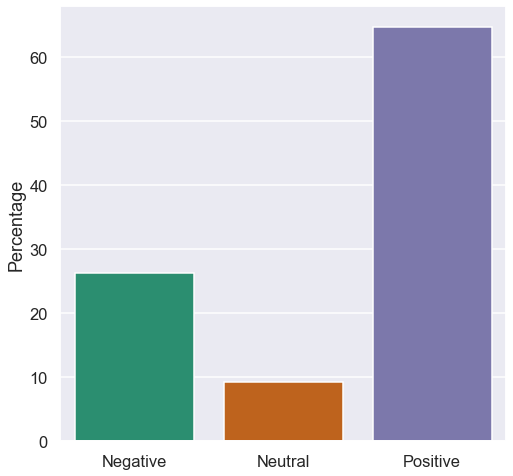

In [246]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [247]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [248]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [249]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [250]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [251]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('apple', 3703),
 ('earnings', 2918),
 ('stocks', 2733),
 ('market', 2443),
 ('stock', 2062),
 ('5', 1348),
 ('shares', 1237),
 ('microsoft', 1163),
 ('new', 1069),
 ('today', 1054),
 ('mid', 1003),
 ('markets', 965),
 ('us', 961),
 ('disney', 945),
 ('says', 944),
 ('report', 931),
 ('watch', 900),
 ('iphone', 888),
 ('update', 859),
 ('day', 810)]

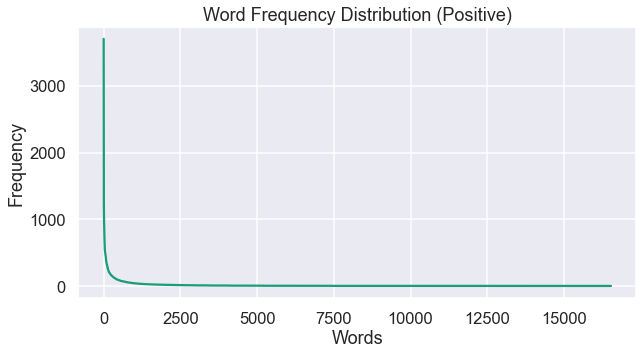

In [252]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

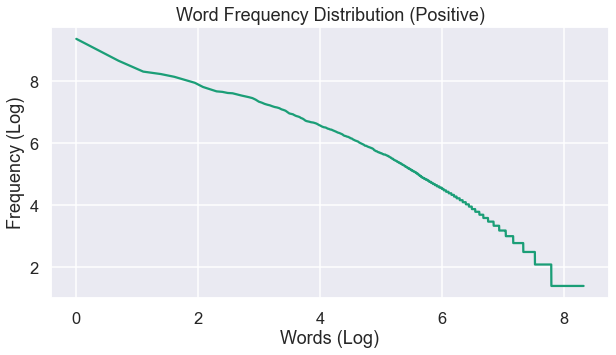

In [253]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [254]:
import yfinance as yf
import pandas_ta as ta
#TL;DR: Use EMA to predict the shit 
df2 = pd.read_excel("data/data_scrape.xlsx")
# print(df.shape)

#Slicing original df

highClose_df = df2[['Date','Open','High','Low','Close','Volume']]


#add some technical indicators
highClose_df['RSI'] = ta.rsi(highClose_df.Close, length=15)
highClose_df['EMA34_Fast'] = ta.ema(highClose_df.Close, length=34)
highClose_df['EMA89_Medium'] = ta.ema(highClose_df.Close, length=89)
highClose_df['EMA200_Slow'] = ta.ema(highClose_df.Close, length=200)

#Target Column is the price change through the day
highClose_df['Target'] = highClose_df['Close'] - highClose_df['Open']
highClose_df['Target'] = highClose_df['Target'].shift(-1) 

#Currently, target class means the next day "Bullish" or "Bearish" technically
highClose_df['TargetClass'] = [1 if highClose_df.Target[i] > 0 else 0 for i in range(len(highClose_df))]

#predict close price next day 
highClose_df['PredictNextClose'] = highClose_df['Close'].shift(-1)

highClose_df
# finalHighClose_df.to_excel("../Feature_engineer/data/data_technical_analysis.xlsx")

,Date,Open,High,Low,Close,Volume,RSI,EMA34_Fast,EMA89_Medium,EMA200_Slow,Target,TargetClass,PredictNextClose
0,2016-01-04,103.183176,103.324589,101.929334,103.230316,50807600,NaN,NaN,NaN,NaN,-0.688205,0,103.051201
1,2016-01-05,103.739406,103.871390,102.570407,103.051201,38795200,NaN,NaN,NaN,NaN,0.801330,1,102.061302
2,2016-01-06,101.259973,102.655227,101.259973,102.061302,41891100,NaN,NaN,NaN,NaN,-1.018156,0,98.865410
3,2016-01-07,99.883566,101.146845,98.808840,98.865410,61386300,NaN,NaN,NaN,NaN,-1.527238,0,98.054657
4,2016-01-08,99.581895,100.204109,97.950955,98.054657,69344000,NaN,NaN,NaN,NaN,-0.395950,0,98.356339
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,2023-10-24,357.510010,359.910004,355.790009,359.130005,47082100,44.954889,363.927663,360.664425,344.499090,-6.360016,0,350.339996
1966,2023-10-25,356.700012,356.880005,349.750000,350.339996,71190500,37.455470,363.151225,360.434994,344.557208,-5.459991,0,343.660004
1967,2023-10-26,349.119995,350.070007,342.350006,343.660004,78621400,32.976255,362.037441,360.062216,344.548281,-1.119995,0,345.309998
1968,2023-10-27,346.429993,348.839996,344.079987,345.309998,63420200,35.032397,361.081587,359.734389,344.555860,1.370026,1,349.200012


In [255]:
df.head(3)

,neg,neu,pos,compound,headline,label
0,0.014,0.894,0.093,0.9810,Benzinga's Top #PreMarket Gainers Benzinga's T...,1
1,0.134,0.781,0.086,-0.9802,A Glum View On A High-Flying Sector A Glum Vie...,-1
2,0.133,0.806,0.060,-0.9907,Facebook's WhatsApp To Take On FaceTime And Sk...,-1


In [256]:
from os import path
df = pd.concat([highClose_df.drop(columns=["Target", "TargetClass"]), df[["neg", "neu", "pos", "compound"]]], axis=1)
save_path = path.abspath(path.join('__file__', '../..', 'model/data/sentiment.xlsx'))
df.dropna(inplace=True)

df.to_excel(save_path, index=False)
# df